In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

train = pd.read_json('../input/train.json');

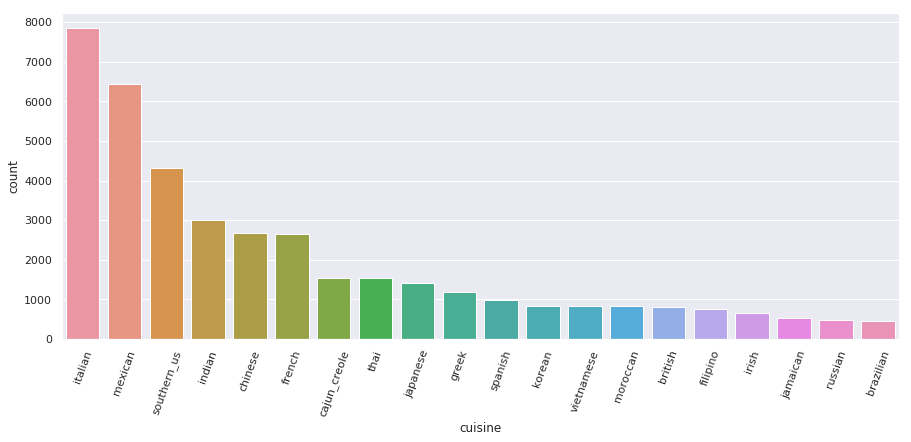

In [52]:
v = train.groupby(['cuisine'])['id'].agg(['count']).sort_values(by='count', ascending=False)

plt.figure(figsize=(15,6))
g = sns.barplot(v.index, v['count'])
g.set_xticklabels(g.get_xticklabels(), rotation=70);

In [163]:
from collections import Counter 
import re
from IPython.display import HTML, display


def normalize(text):
    text = re.sub('\d+%', ' ', text).strip(',')
    if ',' in text:
        x = text.split(',')
        print(x)
    return re.sub('\s+', ' ', text).strip()

def apply_mutator(ingredients, mutator, show=True):
    mutated, results = [], set()
    for ingredient in ingredients:
        ingredient_new = mutator(ingredient)
        if ingredient_new != ingredient:
            mutated.append([ingredient, ingredient_new])
            
        results.add(ingredient_new)
    
    if show:
        df = pd.DataFrame(mutated, columns=['before', 'after'])
        df.style.set_caption('Colormaps, with a caption.')
        display(mutator.__name__, df, f"total count: {len(results)}")

    return results

ingredients = set()
for i in train['ingredients']:
    for j in i:
        ingredients.add(j)

In [164]:
def remove_percentage(ingredient):
    return re.sub('\d+%', '', ingredient)

ingredients_2 = apply_mutator(ingredients, remove_percentage)

'remove_percentage'

,before,after
0,33% less sodium cooked ham,less sodium cooked ham
1,1% low-fat buttermilk,low-fat buttermilk
2,25% less sodium chicken broth,less sodium chicken broth
3,2% reduced-fat milk,reduced-fat milk
4,Yoplait® Greek 2% caramel yogurt,Yoplait® Greek caramel yogurt
5,1% low-fat cottage cheese,low-fat cottage cheese
6,2% lowfat greek yogurt,lowfat greek yogurt
7,33% less sodium smoked fully cooked ham,less sodium smoked fully cooked ham
8,1% low-fat milk,low-fat milk
9,2% low-fat cottage cheese,low-fat cottage cheese


'total count: 6713'

In [165]:
def remove_actions(ingredient):
    ingredient = ingredient.strip(',')
    if ',' in ingredient:
        ingredient, _ = ingredient.split(',')
    return ingredient

ingredients_3 = apply_mutator(ingredients_2, remove_actions)

'remove_actions'

,before,after
0,"whole kernel corn, drain",whole kernel corn
1,"penn pasta, cook and drain",penn pasta
2,"clove garlic, fine chop",clove garlic
3,"tortellini, cook and drain",tortellini
4,"frozen whip topping, thaw",frozen whip topping
5,"cream cheese, soften",cream cheese
6,"uncook medium shrimp, peel and devein",uncook medium shrimp
7,"frozen crabmeat, thaw and drain",frozen crabmeat
8,"mussels, well scrubbed",mussels
9,"tuna, drain and flake",tuna


'total count: 6693'

In [166]:
def remove_paranthesis(ingredient):
    return re.sub('\(.*?\)', '', ingredient)

ingredients_4 = apply_mutator(ingredients_3, remove_paranthesis)

'remove_paranthesis'

,before,after
0,( oz.) tomato paste,tomato paste
1,(15 oz.) refried beans,refried beans
2,asafetida (powder),asafetida
3,( oz.) tomato sauce,tomato sauce
4,(14.5 oz.) diced tomatoes,diced tomatoes
5,hing (powder),hing
6,besan (flour),besan
7,(10 oz.) frozen chopped spinach,frozen chopped spinach
8,(14 oz.) sweetened condensed milk,sweetened condensed milk
9,kielbasa (not low fat),kielbasa


'total count: 6693'

In [167]:
DIACRITIC = {'è': 'e', 'é': 'e', 'â': 'a', 'ç': 'c', 'í': 'i', 'î': 'i', 'ú': 'u'}

def remove_diacritic(ingredient, mapping=DIACRITIC):
    return ''.join(mapping.get(c, c) for c in ingredient)

ingredients_5 = apply_mutator(ingredients_4, remove_diacritic)

'remove_diacritic'

,before,after
0,grated Gruyère cheese,grated Gruyere cheese
1,filé,file
2,crème de menthe,creme de menthe
3,dark crème de cacao,dark creme de cacao
4,Truvía® natural sweetener,Truvia® natural sweetener
5,tomato purée,tomato puree
6,bâtarde,batarde
7,pâte brisée,pate brisee
8,açai,acai
9,marrons glacés,marrons glaces


'total count: 6692'

In [168]:
def remove_numbers(ingredient):
    return re.sub(r'\d+', '', ingredient)

ingredients_6 = apply_mutator(ingredients_5, remove_numbers)

'remove_numbers'

,before,after
0,7 Up,Up
1,8 ounc ziti pasta,ounc ziti pasta
2,mexican style 4 cheese blend,mexican style cheese blend
3,V8 Juice,V Juice
4,Bengali 5 Spice,Bengali Spice
5,licor 43,licor
6,2 1/2 to 3 lb. chicken,/ to lb. chicken
7,Sargento® Traditional Cut Shredded 4 Cheese Me...,Sargento® Traditional Cut Shredded Cheese Mex...
8,Yoplait® Greek 100 blackberry pie yogurt,Yoplait® Greek blackberry pie yogurt
9,Tipo 00 flour,Tipo flour


'total count: 6692'

In [169]:
def remove_nonasci(ingredient):
    return re.sub('[!™®]', '', ingredient)
#     return re.sub('[^-a-zA-Z \'&’.]', '?', ingredient)

ingredients_7 = apply_mutator(ingredients_6, remove_nonasci)

'remove_nonasci'

,before,after
0,Bertolli® Alfredo Sauce,Bertolli Alfredo Sauce
1,Knorr® Pasta Sides™ - Butter & Herb,Knorr Pasta Sides - Butter & Herb
2,I Can't Believe It's Not Butter!® All Purpose ...,I Can't Believe It's Not Butter All Purpose St...
3,Spice Islands® Minced Garlic,Spice Islands Minced Garlic
4,Green Giant™ sliced mushrooms,Green Giant sliced mushrooms
5,Johnsonville® Mild Italian Ground Sausage,Johnsonville Mild Italian Ground Sausage
6,Old El Paso™ taco seasoning mix,Old El Paso taco seasoning mix
7,Hidden Valley® Original Ranch® Dressing,Hidden Valley Original Ranch Dressing
8,Land O Lakes® Butter,Land O Lakes Butter
9,Betty Crocker™ oatmeal cookie mix,Betty Crocker oatmeal cookie mix


'total count: 6692'

In [171]:
def lowercase(ingredient):
    return ingredient.lower()

ingredients_8 = apply_mutator(ingredients_7, lowercase)

'lowercase'

,before,after
0,Ragu Traditional Sauce,ragu traditional sauce
1,Heinz Tomato Ketchup,heinz tomato ketchup
2,Kikkoman Soy Sauce,kikkoman soy sauce
3,California bay leaves,california bay leaves
4,Pace Picante Sauce,pace picante sauce
5,Massaman curry paste,massaman curry paste
6,KNUDSEN Milkfat Low Fat Cottage Cheese,knudsen milkfat low fat cottage cheese
7,Alaskan king crab legs,alaskan king crab legs
8,Pillsbury Pie Crusts,pillsbury pie crusts
9,Ragu Classic Alfredo Sauce,ragu classic alfredo sauce


'total count: 6678'

In [142]:
# def remove_shortwords(ingredient, min_len=3):
#     words = ingredient.split(' ')
#     return ' '.join(filter(lambda x: len(x) >= min_len, words))

# ingredients_7 = apply_mutator(ingredients_6, remove_shortwords)

In [155]:
words = Counter()
for ingredient in ingredients_6:
    words.update(ingredient.split(' '))
    
print(len(words))
for word, count in words.most_common():
    if count == 1:
        print(word)

3500
dog
bun
tamale
piment
despelette
Gruyere
sweetbreads
fregola
mince
grill
tobiko
zero
jarred
flan
challa
California
Picante
guinea
cantal
tomate
canning
trumpet
menthe
Massaman
cuminseed
Alaskan
Pie
Crusts
flatbread
cappuccino
wax
ngo
chicharron
maitake
Classic
Pecan
Halves
Haas
avocados
pollock
fatback
Daiya
Saffron
Road
Up
nettle
straight
gran
marnier
parmigiana-reggiano
glass
kefalotiri
Krispies
drained
peapods
bermuda
shell-on
amchur
saltpeter
Neapolitan
arak
bisquick
chat
triple
sec
branca
menta
swede
butter-flavored
Herb
jimmies
comice
demerara
cognac
Sticks
wings
plums
fiddlehead
ferns
yardlong
olek
teff
ibarra
puffs
finger
adzuki
soaking
corned
Homemade
moose
Islands®
Minced
Karo
Syrup
Argo
bows
pinenuts
non-fat
Matzo
Meal
beverages
acini
pepe
tropic
kirby
capicola
chia
gala
sockeye
Rotel
spiced
coars
bucatini
gem
jaggery
thinli
doenzang
mirlitons
Baileys
marsala
ouzo
mora
Azteca
brie
liquorice
jello
sprig
Giant™
chilean
Mezzetta
Sliced
Kalamata
Olives
falafel
hock
precooke